In [1]:
# data from: https://www.tsa.gov/coronavirus/passenger-throughput?page=0
import pandas as pd

data=pd.read_csv("tsa_traffic_data.csv")
data.head()

,Date,Number of passengers
0,01-Mar,2280522
1,02-Mar,2089641
2,03-Mar,1736393
3,04-Mar,1877401
4,05-Mar,2130015


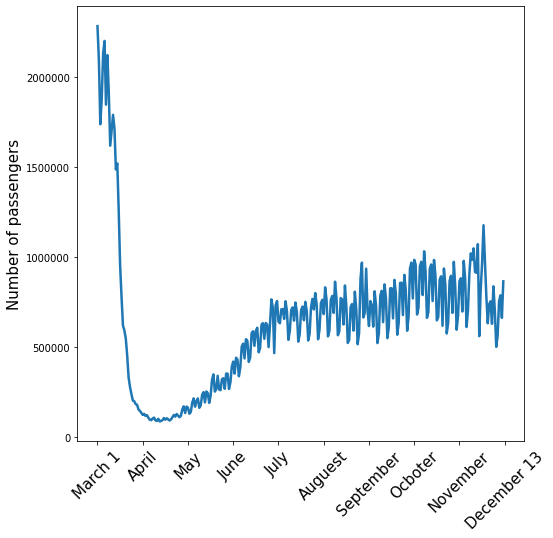

In [2]:
import numpy as np
import matplotlib.pyplot as plt

label=["March 1","April","May","June","July","Auguest",
       "September","Ocboter","November","December 13"]
plt.figure(figsize=(8,8))
plt.plot(data['Date'],data['Number of passengers'],linewidth=2.5)
plt.xticks(np.arange(0,320,32),labels=label,rotation=45,fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Number of passengers",fontsize=15)
plt.show()

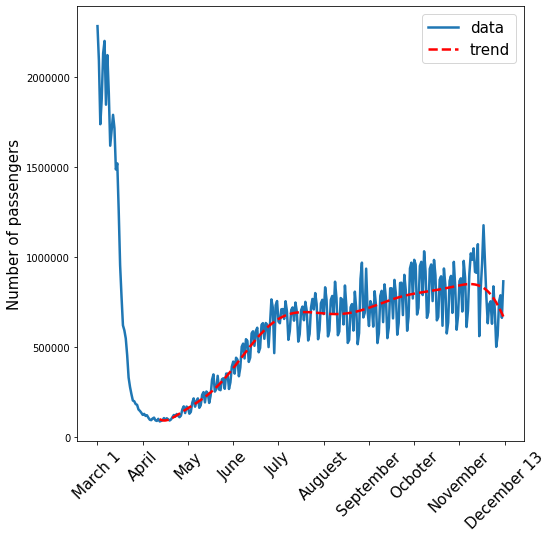

In [3]:
start_point=data["Number of passengers"].idxmin()
n=len(data['Date'])
y=data["Number of passengers"][start_point:n]
x=np.arange(start_point,n)

trendpoly=np.poly1d(np.polyfit(x,y,10))

plt.figure(figsize=(8,8))
plt.plot(data['Date'],data['Number of passengers'],linewidth=2.5,label='data')
plt.xticks(np.arange(0,320,32),labels=label,rotation=45,fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.plot(x,trendpoly(x),'--r',label='trend',linewidth=2.5)
plt.legend(fontsize=15)
plt.ylabel("Number of passengers",fontsize=15)
plt.show()

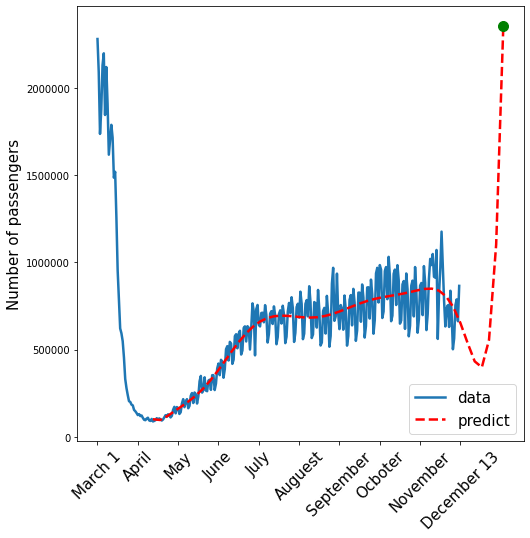

In [4]:
x_new=np.linspace(start_point,n+34)

plt.figure(figsize=(8,8))
plt.plot(data['Date'],data['Number of passengers'],linewidth=2.5,label='data')
plt.xticks(np.arange(0,320,32),labels=label,rotation=45,fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.plot(x_new,trendpoly(x_new),'--r',label='predict',linewidth=2.5)

date=322
plt.plot(date,trendpoly(date),'go',markersize=10)

plt.legend(fontsize=15)
plt.ylabel("Number of passengers",fontsize=15)
plt.show()

In [5]:
print("the daily traffic just before Covid-19:",data['Number of passengers'][0])
print(trendpoly(date))
print("Find number of days to recover traffic just before Covid-19:",date-len(data['Date']))

the daily traffic just before Covid-19: 2280522
2354389.6026456878
Find number of days to recover traffic just before Covid-19: 34


In [6]:
n=len(data['Date'])
y=data['Number of passengers']
x=np.arange(0,n)
x_new=x.reshape(-1,1)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_new,y)
clf.score(x_new,y)

/Users/DoyoonLee/Dropbox (SFC-CNS)/2-f-Dropbox/kenkyukai/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.013888888888888888